<a href="https://colab.research.google.com/github/inesNeji/Date-palm-varieties-classification-/blob/main/Project_by_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/Uncleaned_employees_final_dataset (1).csv')

# Display the first few rows of the DataFrame
data.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [2]:
# Checking for missing values in the dataset
data.isnull().sum()


employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [3]:
# Displaying the summary statistics for numerical columns
numerical_summary = data.describe()

# Counting the unique values for categorical columns
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
categorical_summary = data[categorical_columns].nunique().to_frame('Unique Values')

numerical_summary, categorical_summary


(        employee_id  no_of_trainings           age  previous_year_rating  \
 count  17417.000000     17417.000000  17417.000000          16054.000000   
 mean   39083.491129         1.250732     34.807774              3.345459   
 std    22707.024087         0.595692      7.694046              1.265386   
 min        3.000000         1.000000     20.000000              1.000000   
 25%    19281.000000         1.000000     29.000000              3.000000   
 50%    39122.000000         1.000000     33.000000              3.000000   
 75%    58838.000000         1.000000     39.000000              4.000000   
 max    78295.000000         9.000000     60.000000              5.000000   
 
        length_of_service  KPIs_met_more_than_80    awards_won  \
 count       17417.000000           17417.000000  17417.000000   
 mean            5.801860               0.358845      0.023368   
 std             4.175533               0.479675      0.151074   
 min             1.000000               0

In [4]:
# Filling missing values in the 'education' column with the mode (most common value)
data['education'].fillna(data['education'].mode()[0], inplace=True)

# Filling missing values in the 'previous_year_rating' column with the median
data['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True)

# Checking if all missing values have been filled
data.isnull().sum()


employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

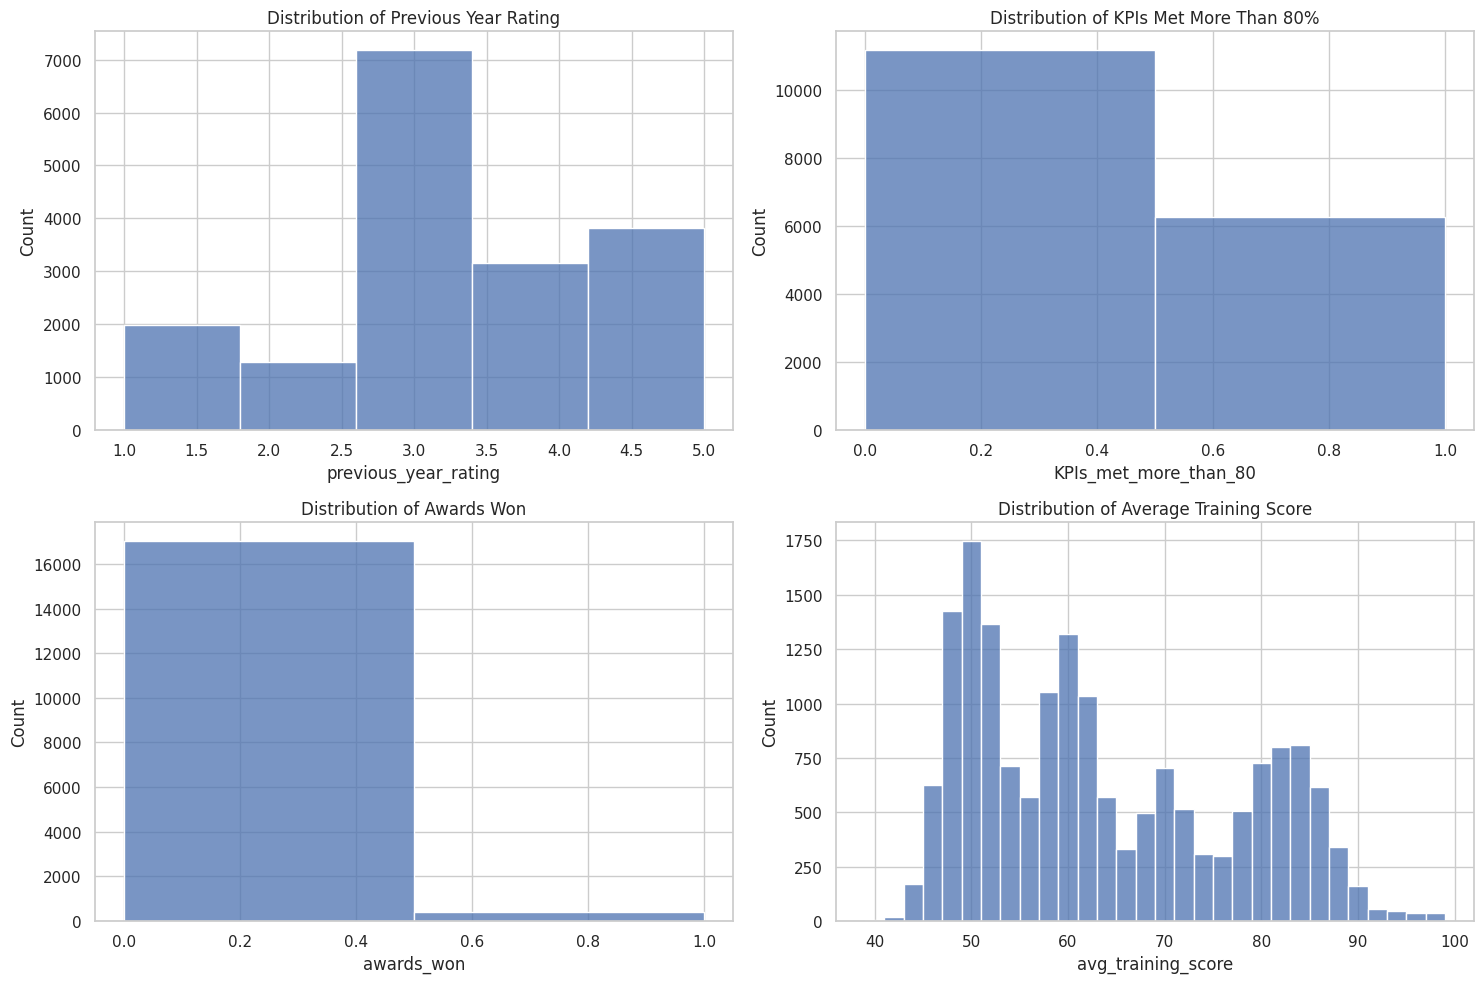

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a figure for the plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the distributions of the performance indicators
sns.histplot(data['previous_year_rating'], ax=ax[0, 0], kde=False, bins=5)
ax[0, 0].set_title('Distribution of Previous Year Rating')

sns.histplot(data['KPIs_met_more_than_80'], ax=ax[0, 1], kde=False, bins=2)
ax[0, 1].set_title('Distribution of KPIs Met More Than 80%')

sns.histplot(data['awards_won'], ax=ax[1, 0], kde=False, bins=2)
ax[1, 0].set_title('Distribution of Awards Won')

sns.histplot(data['avg_training_score'], ax=ax[1, 1], kde=False, bins=30)
ax[1, 1].set_title('Distribution of Average Training Score')

# Adjusting the layout
plt.tight_layout()
plt.show()


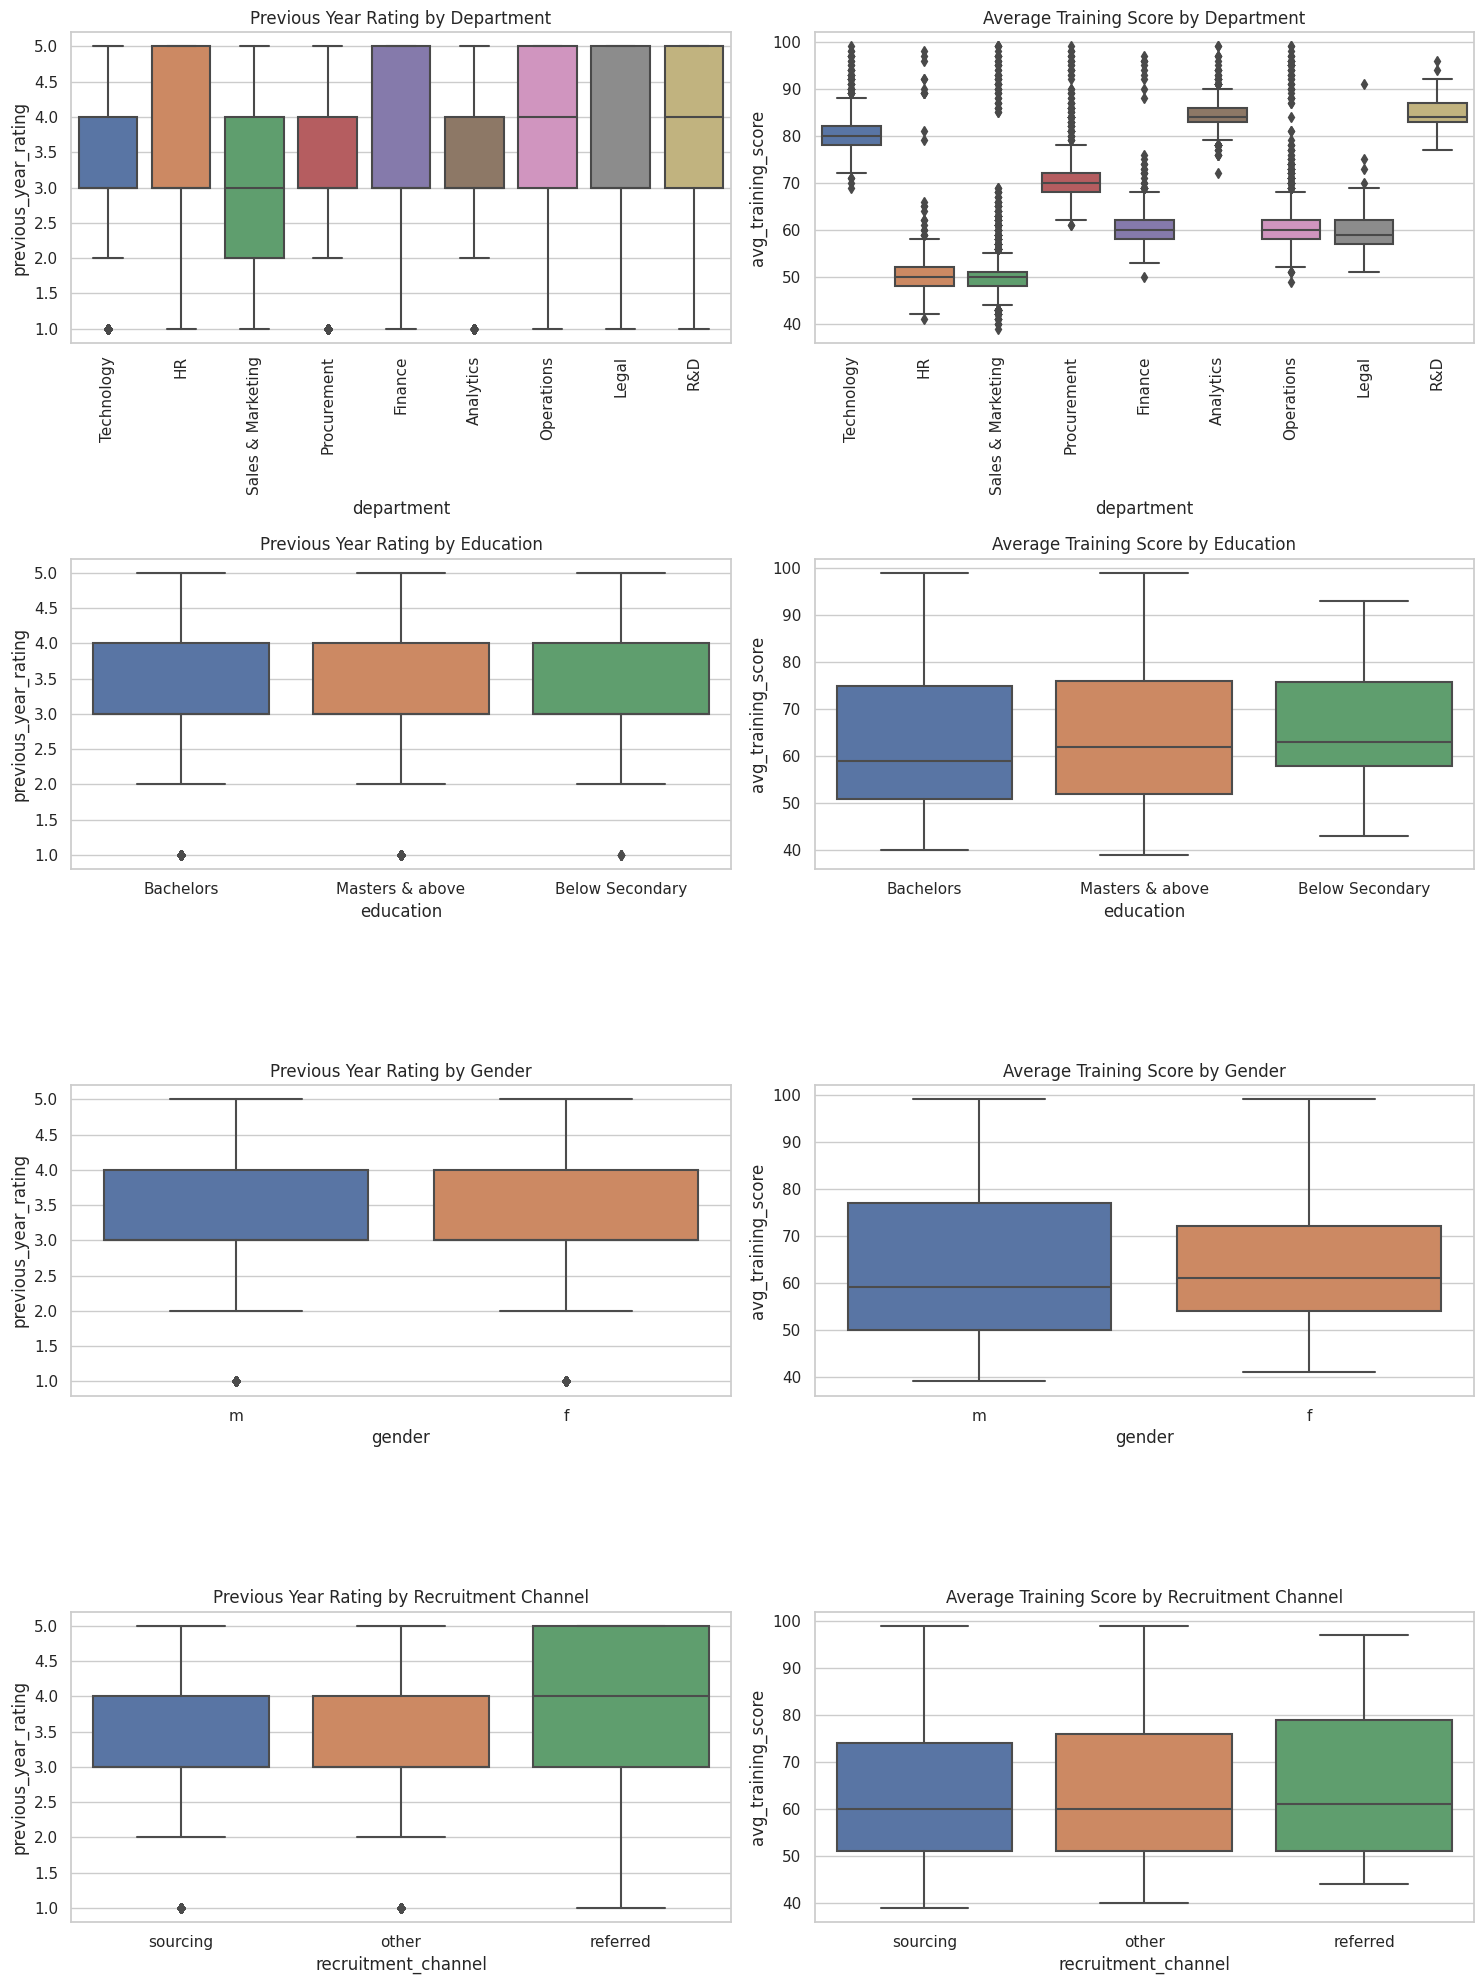

In [6]:
# Creating a figure for the plots
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

# Plotting the relationships between the performance indicators and the 'department' feature
sns.boxplot(x='department', y='previous_year_rating', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Previous Year Rating by Department')
ax[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='department', y='avg_training_score', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Average Training Score by Department')
ax[0, 1].tick_params(axis='x', rotation=90)

# Plotting the relationships between the performance indicators and the 'education' feature
sns.boxplot(x='education', y='previous_year_rating', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Previous Year Rating by Education')

sns.boxplot(x='education', y='avg_training_score', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Average Training Score by Education')

# Plotting the relationships between the performance indicators and the 'gender' feature
sns.boxplot(x='gender', y='previous_year_rating', data=data, ax=ax[2, 0])
ax[2, 0].set_title('Previous Year Rating by Gender')

sns.boxplot(x='gender', y='avg_training_score', data=data, ax=ax[2, 1])
ax[2, 1].set_title('Average Training Score by Gender')

# Plotting the relationships between the performance indicators and the 'recruitment_channel' feature
sns.boxplot(x='recruitment_channel', y='previous_year_rating', data=data, ax=ax[3, 0])
ax[3, 0].set_title('Previous Year Rating by Recruitment Channel')

sns.boxplot(x='recruitment_channel', y='avg_training_score', data=data, ax=ax[3, 1])
ax[3, 1].set_title('Average Training Score by Recruitment Channel')

# Adjusting the layout
plt.tight_layout()
plt.show()


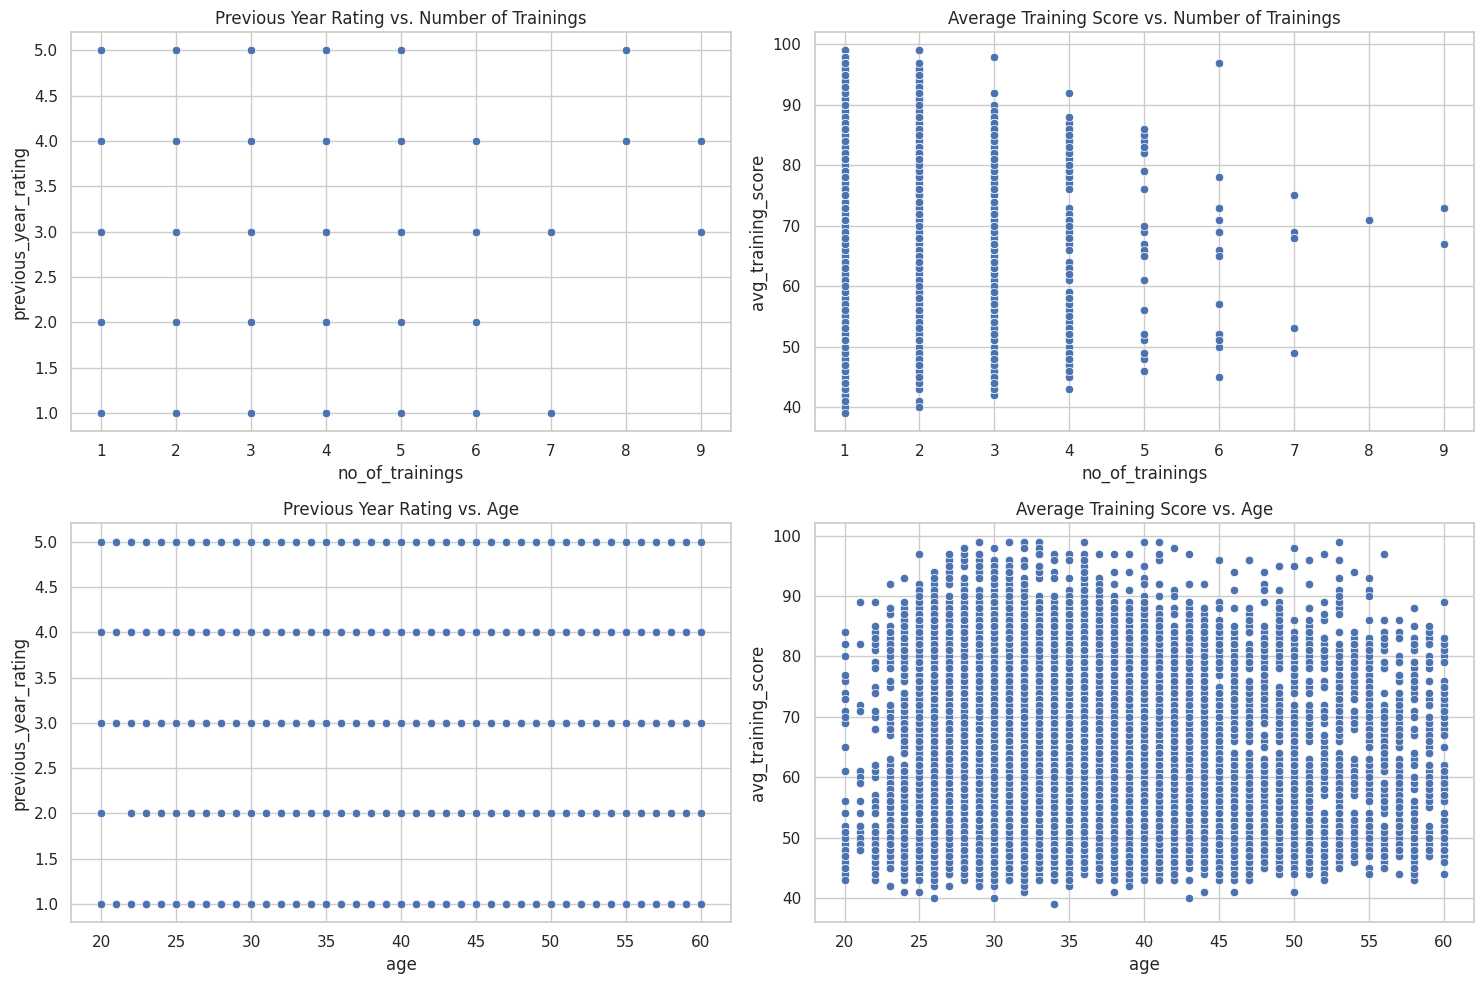

In [7]:
# Creating a figure for the plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the relationships between the performance indicators and the 'no_of_trainings' feature
sns.scatterplot(x='no_of_trainings', y='previous_year_rating', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Previous Year Rating vs. Number of Trainings')

sns.scatterplot(x='no_of_trainings', y='avg_training_score', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Average Training Score vs. Number of Trainings')

# Plotting the relationships between the performance indicators and the 'age' feature
sns.scatterplot(x='age', y='previous_year_rating', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Previous Year Rating vs. Age')

sns.scatterplot(x='age', y='avg_training_score', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Average Training Score vs. Age')

# Adjusting the layout
plt.tight_layout()
plt.show()


<ipython-input-8-d2b63957cfa2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


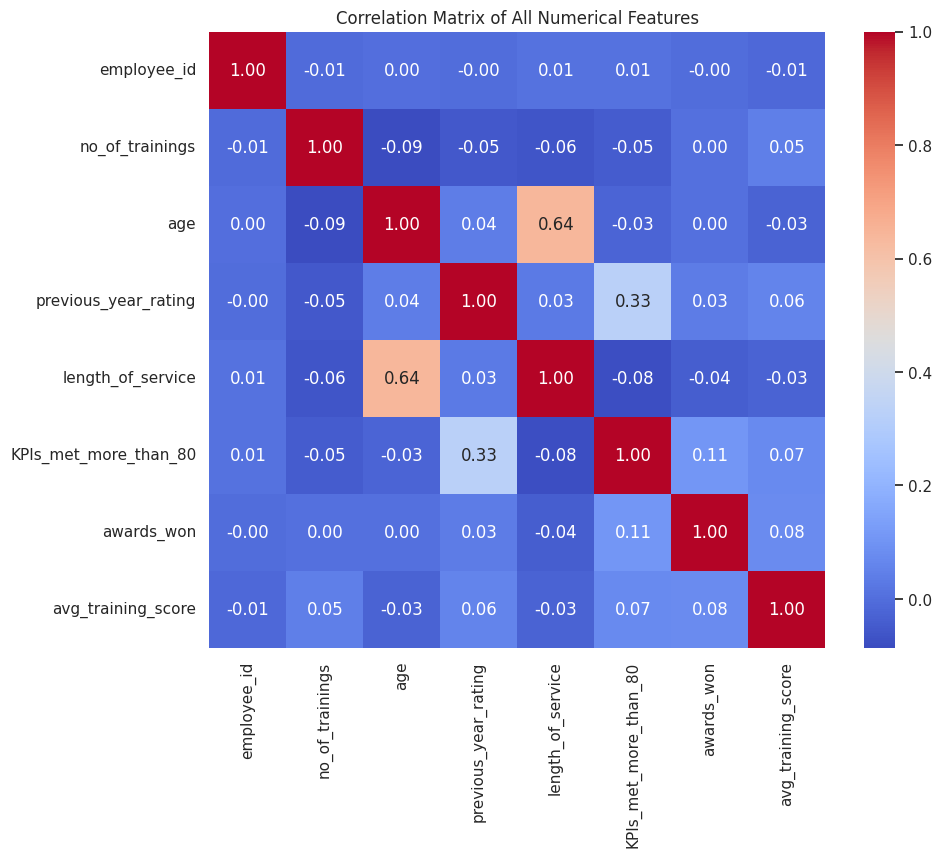

In [8]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Creating a figure for the heatmap
plt.figure(figsize=(10, 8))

# Creating a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Setting the title
plt.title('Correlation Matrix of All Numerical Features')

# Displaying the heatmap
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting the features and the target variable
features = data.drop(['employee_id', 'previous_year_rating'], axis=1)
target = data['previous_year_rating']

# Identifying the categorical features
categorical_features = features.select_dtypes(include=['object']).columns

# Performing one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(features[categorical_features]))

# Replacing the categorical features with the encoded features
features = features.drop(categorical_features, axis=1)
features = pd.concat([features, encoded_features], axis=1)

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((13933, 52), (3484, 52))

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Creating a linear regression model
model = LinearRegression()




In [11]:
# Displaying the feature names
features.columns


Index([      'no_of_trainings',                   'age',
           'length_of_service', 'KPIs_met_more_than_80',
                  'awards_won',    'avg_training_score',
                             0,                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                            10,                      11,
                            12,                      13,
                            14,                      15,
                            16,                      17,
                            18,                      19,
                            20,                      21,
                            22,                      23,
                            24,                      25,
                            26,                      27,
                            28,

In [12]:
# Converting all feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse


1.1409467152401978

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Redefining the target variable
target = data['KPIs_met_more_than_80']

# Splitting the data into a new training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating a logistic regression model
model = LogisticRegression(max_iter=1000)





In [15]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Creating a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)




In [14]:
# Ensuring that all feature names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy



1.0

In [16]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Creating a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)

# Conducting the grid search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [17]:
# Getting the best parameter
best_param = grid_search.best_params_
print(f"Best parameter: {best_param}")

# Getting the best score
best_score = grid_search.best_score_
print(f"Best cross-validation score: {best_score}")

# Evaluating the model on the test set
test_score = grid_search.score(X_test, y_test)
print(f"Test set score: {test_score}")


Best parameter: {'C': 0.01}
Best cross-validation score: 1.0
Test set score: 1.0


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Creating a random forest model
model = RandomForestClassifier(random_state=42)

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy


1.0

In [19]:
# Ensuring that all feature names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Creating a random forest model
model = RandomForestClassifier(random_state=42)

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy


1.0

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Creating individual models
logistic_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier(random_state=42)

# Creating a Voting Classifier with a soft voting strategy
ensemble_model = VotingClassifier(estimators=[('logistic', logistic_model), ('random_forest', random_forest_model)], voting='soft')

# Ensuring that all feature names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Training the ensemble model on the training set
ensemble_model.fit(X_train, y_train)

# Making predictions on the test set
ensemble_predictions = ensemble_model.predict(X_test)

# Calculating the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

# Displaying the accuracy of the ensemble model
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")


Ensemble Model Accuracy: 1.0


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2253
           1       1.00      1.00      1.00      1231

    accuracy                           1.00      3484
   macro avg       1.00      1.00      1.00      3484
weighted avg       1.00      1.00      1.00      3484



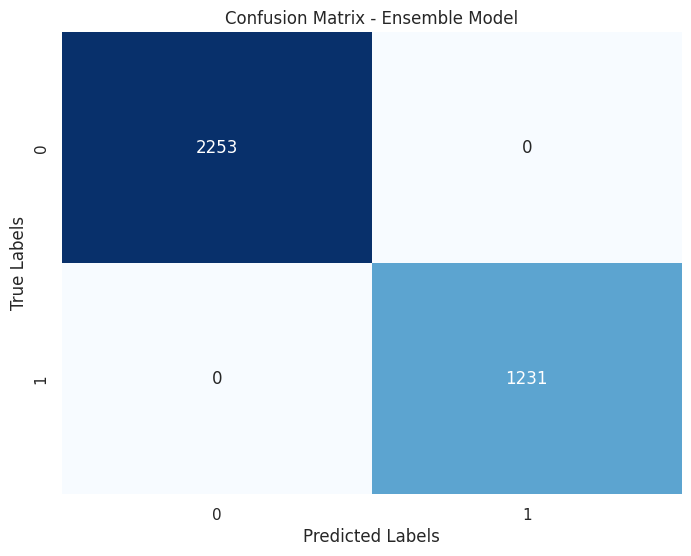

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying the classification report
classification_rep = classification_report(y_test, ensemble_predictions)
print("Classification Report:\n", classification_rep)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()
